<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 1</h3> </center>
<center> <h5>4. Oktober 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>21.10.2024, 10:00 Uhr, via eCampus</b></h5> </center>
</br>

* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
  
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren.

### Aufgabe 1 (Faltungseigenschaften, 6 Punkte)

Zeigt mit Hilfe der Definition für die diskrete 1D Faltungsoperation
$$(f*g)(x)=\sum_{u=-\infty}^\infty f(u)g(x-u)$$
dass
1. der Faltungsoperator kommutativ ist: $(f*g)(x)=(g*f)(x)$ (3P)  </li>
2. der Faltungsoperator assoziativ ist: $((f*g)*h)(x)=(f*(g*h))(x)$ (3P)  </li>

# Lösung:

## Kommutativität

\begin{align*}
(g * f)(x) &= \sum_{u = -\infty}^{\infty} g(u) \cdot f(x - u) | \text{Setze } u = x - v \text{, bildet surjektiv ab auf } \mathbb{Z}\\
&= \sum_{v=-\infty}^\infty g(x - v) \cdot f(x - (x - v)) \\
&= \sum_{v = -\infty}^\infty f(v) \cdot g(x - v) \\
&= (f * g)(x)
\end{align*}

## Assoziativität

\begin{align*}
((f * g) * h)(x) &= \sum_{v = -\infty}^\infty \left( \sum_{u = -\infty}^\infty f(u) \cdot g(v - u) \right) \cdot h(x - v) \\
&= \sum_{v = -\infty}^\infty \sum_{u = -\infty}^\infty f(u) \cdot g(v - u) \cdot h(x - v) \\
&= \sum_{u = -\infty}^\infty \sum_{v = -\infty}^\infty f(u) \cdot g(v - u) \cdot h(x - v) | \text{Setze } v = u + w \text{, bildet surjektiv ab auf } \mathbb{Z} \\
&= \sum_{u = -\infty}^\infty \sum_{w = -\infty}^\infty f(u) \cdot g(u + w - u) \cdot h(x - u - w) \\
&= \sum_{u = -\infty}^\infty f(u) \cdot \left( \sum_{w = -\infty}^\infty g(w) \cdot h((x - u) - w) \right) \\
&= (f * (g * h))(x)

\end{align*}

### Aufgabe 2 (Faltungsbasierte Bildfilterung, 6 Punkte)

1. Gegeben sei ein 15x15 Kern (k1), in welchem alle Diagonalelemente $\frac{1}{15}$ sind und alle Nicht-Diagonalelemente null. Welchen Effekt hat dieser Filter? (1P)</li>
2. Gegeben sei ein weiterer 15x15 Kern (k2), in welchem alle Elemente in der achten Reihe $\frac{1}{15}$ sind und alle anderen null. Welchen Effekt hat dieser Filter? (1P)</li>
3. Angenommen, wir wenden k1 und k2 nacheinander auf das selbe Bild an. Beschreibt kurz den Unterschied, der bei Vertauschung der Reihenfolge entsteht. (2P)</li>
4. Gibt es einen Unterschied zwischen der Anwendung von k1 und k2 nacheinander und einer einmaligen Anwendung eines 15x15 Kerns mit $\frac{1}{15}$ auf der Diagonalen und in der achten Reihe, der ansonsten nur Nullen aufweist? Wenn nicht, erklärt kurz warum. Wenn doch, wie müsste ein Kern aussehen, dessen Anwendung äquivalent zur Anwendung von k1 und k2 ist? (2P)

#Lösung:#Lösung
1. Wenn k1 angewandt wird, wird der Mittelwert von der Diagonalen in einen 15x15 Bereich gewählt. Damit wird in Diagonal Richtung geglättet. 
2. Wenn k2 angewandt wird, wird der Mittelwert von der Horizontalen in einen 15x15 Bereich gewählt. Damit wird in Horizontal Richtung geglättet. 
3. Es ensteht kein Unterschied, da die Faltung kommutativ ist.
4. Unteranderem haben wir mehr als 15 Werte mit $\frac{1}{15}$. Für die Zweite Frage kann man sich zu

In [9]:
import numpy as np
import scipy as sp
k1 = np.diag([1] * 15)
k2 = np.zeros((15, 15))
k2[7,:] = 1
k = sp.signal.convolve(k1, k2, mode='full')
k = np.where(k > 0.5, 1, 0)
print(k)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 

### Aufgabe 3 (NumPy-Tricks, 18 Punkte)  
In der Bildverarbeitung müssen Operationen häufig auf vielen Pixeln gleichzeitig durchgeführt werden. Mit den richtigen Tricks kann man solche Probleme mit NumPy häufig elegant in einer einzelnen Zeile lösen. Meistens läuft solcher Code sogar deutlich schneller als kompliziertere, z.B. als Schleifen "handgeschriebene" Lösungen. Diese Aufgabe möchte Euch diese Möglichkeiten näherbringen. Im Laufe des Semesters könnt Ihr sie dann immer wieder anwenden. Es ist möglich, jede Teilaufgabe mit einer Zeile Code zu lösen (79 Zeichen inklusive Leerzeichen, ausgenommen sind imports und Kommentare).

#### a) Erzeugt mit ```np.linspace``` ein Array mit den Zahlen von 0 bis 100 (einschließlich) in 10er-Schritten. (1P)

In [5]:
import numpy as np

#Lösung:
print(np.linspace(0, 100, 11))

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


#### b) Das gleich Array lässt sich auch mit der Funktion ```np.arange``` erzeugen, wie? Was ist der Unterschied zwischen beiden Funktionen? (2P)

# Lösung:
Mit linspace kann man auf die Schrittgröße schließen, man gibt also die anzahl an Values und min und max und die Schritte folgen, bei np.arange gibt man die Schrittgröße an und es wird auf die Schritte geschlossen, also kann man mit np.arange(0,101,10) das gleiche erreichen. 



#### c) Auch mit der `range` Funktion lässt sich ein solches Array erstellen, wie? Wieso oder wann ist es vorteilhaft die numpy Funktionen zu benutzen? (1P)

# Lösung:
Numpy arrays sind effizienter und schneller. Man kann dann auch gut weiterrechnen, da man die Numpy Funktionen benutzen kann. Mir fällt kein Grund ein wieso eine Liste sinvoll sein sollte, wenn man es sich aussuchen kann von den Datentyp. 

#### d) Erzeugt mit ```np.linspace``` eine 11x3-Matrix, in deren drei Spalten Zahlen von 0 bis 10 (einschließlich), 0 bis 100, bzw. 0 bis 1000 stehen. Wählt die Schrittgröße so, dass die Sprünge innerhalb jeder Spalte gleichmäßig sind. (2P)

In [23]:
# Lösung:
np.linspace([0, 0, 0], [10, 100, 1000], 11)


array([[   0.,    0.,    0.],
       [   1.,   10.,  100.],
       [   2.,   20.,  200.],
       [   3.,   30.,  300.],
       [   4.,   40.,  400.],
       [   5.,   50.,  500.],
       [   6.,   60.,  600.],
       [   7.,   70.,  700.],
       [   8.,   80.,  800.],
       [   9.,   90.,  900.],
       [  10.,  100., 1000.]])

#### e) Erzeugt mit ```np.random.uniform``` ein 3D-Array der Größe 10x20x30, gefüllt mit gleichverteilten Zufallszahlen zwischen 0 und 10. (1P)

In [26]:
# Lösung:
np.random.uniform(0,10,(10,20,30))

array([[[2.37351906, 0.71677463, 9.86603334, ..., 6.75783331,
         0.44267146, 9.95845199],
        [6.75269108, 7.9115688 , 6.41072364, ..., 7.97404925,
         9.99885386, 4.64712699],
        [2.62583087, 0.25711531, 5.66346603, ..., 6.88902289,
         6.68108399, 6.99726369],
        ...,
        [4.79212688, 6.32209129, 5.60331193, ..., 1.46837554,
         5.97850341, 3.06637081],
        [9.65524005, 3.84790105, 6.25446946, ..., 2.06568643,
         6.41711782, 8.05253832],
        [8.98329232, 0.24355305, 9.38068658, ..., 1.44680792,
         2.03238625, 1.94035196]],

       [[4.42485989, 3.86645166, 0.66165157, ..., 2.45976707,
         7.40780857, 4.59596675],
        [9.88727796, 7.35840288, 8.72664553, ..., 7.35024911,
         6.61171843, 8.87176416],
        [1.2287923 , 9.9591835 , 6.50911099, ..., 8.08549049,
         9.5873694 , 1.61754626],
        ...,
        [4.85030396, 0.83822652, 2.13488444, ..., 2.60845025,
         0.6296747 , 8.69248398],
        [5.2

#### f) Erzeugt ein Array gefüllt mit Einsen, das dieselbe Form hat wie das Array aus der vorherigen Aufgabe. 
_Hinweis:_ Dabei ist es nicht nötig, die Form explizit abzufragen oder als Argument zu verwenden. (2P)

In [27]:
# Lösung:
np.ones((10,20,30))

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

#### g) Erzeugt den Kern eines Mittelwertfilters der Größe 3x3. (1P)

In [41]:
# Lösung:
c = np.ones((3,3))/9

#### h) Die Variable ```img``` enthält 50 "Bilder" der Größe 100x100. Faltet mit einem einzigen Aufruf alle 50 Bilder mit dem Mittelwertfilter aus der vorherigen Aufgabe. (2P)
_Tipp: Man kann Arrays zusätzliche Dimensionen geben._ 

In [60]:
np.random.seed(42)
img = np.random.uniform(0, 1, size=(100, 100, 50))
#TODO wtf do they want from me D: 


#### i) Berechnet ein Array mit der gleichen Größe wie ```img``` und befüllt es dort mit Einsen, wo ```img``` größer ist als 0.99. Alle anderen Einträge setzt Ihr auf Null. (2P)

In [61]:
# Lösung:

np.where(img > 0.99, 1, 0)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### j) Summiert für jedes der 50 Bilder in ```img``` die Werte aller Pixel die größer sind als 0.99. (2P)

In [67]:
# Lösung:
(np.sum(np.where(img > 0.99,img,0),(0,1)))

array([ 84.58028514, 106.48263679, 104.54003751, 102.45874858,
       108.49158158,  99.44127339,  87.56860121, 108.50598058,
       103.47436752, 116.40929188,  82.57776222,  91.55120384,
       110.44589585,  85.55127726, 124.36125751, 114.48547681,
        88.58306643, 103.46270541,  93.53923645,  92.54461348,
        92.52512466,  84.57490576,  81.62861847,  95.51384184,
        91.53677396, 103.50654845, 101.49724291, 100.47294247,
        82.61124719, 107.50502635,  99.50363971,  96.45440835,
        96.49099822, 109.41758691, 101.48638289,  94.55059325,
        96.54088396,  81.62538743,  90.45902541,  87.56469344,
        90.56297284, 117.37216942,  83.59100698, 109.4432213 ,
        87.56056252, 100.48326995,  97.53364658, 119.36541009,
       100.46744102,  92.57788009])

#### k) Bestimmt die Anzahl der Pixel in ```img```, die in mindestens einem der Bilder größer als 0.99 sind. (2P)

In [71]:
# Lösung\
np.sum(np.where(np.max(img, (2)) > 0.99, 1, 0))

3916

### Aufgabe 4 (Arbeiten mit Bildern, 20 Punkte)

Im ZIP-Archiv des Übungsblattes befinden sich unter anderem die Bilder CFP.png und rgbCFP.png. Sie erscheinen im Fließtext unter Abbildung eins, sofern ihr sie in den gleichen Ordner wie das Notebook selbst extrahiert habt. 

Color Fundus Photography (CFP) ist ein Bildgebungsverfahren, welches den Fundus, also den hinteren Teil des Auges, sichtbar macht. Dabei wird die Retina mit weißem Licht bestrahlt, sodass sie im vollen Farbspektrum examiniert werden kann.
<p align="center">
  <img alt="CFP" src="CFP.png" width="45%">
&nbsp; &nbsp; &nbsp; &nbsp;
  <img alt="rgb CFP" src="rgbCFP.png" width="45%">
</p>
Abbildung 1: Color Fundus Photography (CFP) Ablichtung (links). Modifizierte CFP; rote, grüne und blaue Kanäle separat (rechts).
</br>
In dieser Übung nutzen wir die CFP-Aufnahme aus Abbildung 1 (links), die ihr auch auf der entsprechenden <a href="https://en.wikipedia.org/wiki/Fundus_photography">Wikipediaseite</a> findet. Ihr lernt in dieser Aufgabe, Bilder einzulesen, zu manipulieren und zu visualisieren.   
</br>

#### a) Ladet mit der imread-Funktion von scikit-image das Bild CFP.png in eine Variable und damit in euren Arbeitsspeicher. Gebt die Dimensionalität des Bildes aus. (4P)

In [11]:
# importiert die nötigen Module
import skimage as ski
import os
# Speichert das Bild in einer Variable
filename = os.path.join('CFP.png')
image = ski.io.imread(filename)
# Gebt ihre Dimensionalität aus
image.shape

(797, 1200, 3)

#### b) scikit-image liest Bilder standardmäßig als 8-bit unsigned integer ein. Was passiert, wenn ihr die Werte in eurer Variable um +51 oder -51 verschiebt? Visualisiert das Ergebnis beider *Shifts*. Wie erklärt ihr die Resultate? (4P)

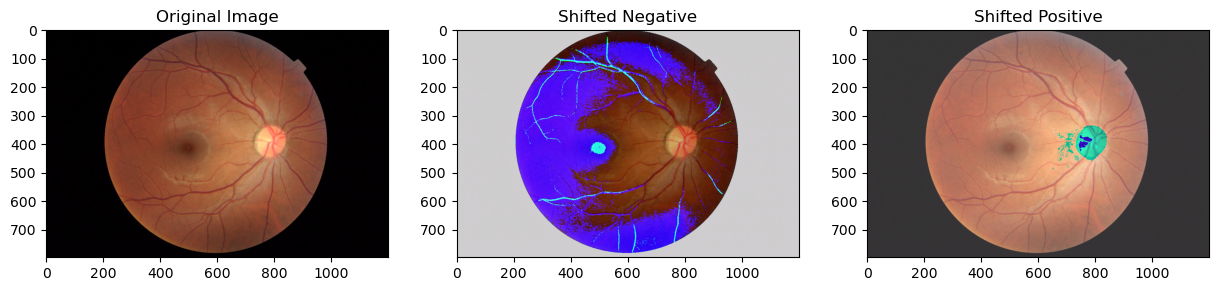

In [17]:
# Ihr könnt die Variable aus der vorherigen Aufgabe erneut benutzen oder sie hier neu deklarieren

# Speichert die Ergebnisse der shifts jeweils in einer neuen Variable
shifted_negative = image - 51
shifted_positive = image + 51
# Visualisiert und erklärt die Ergebnisse in einem (oder mehreren) Plots l
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(shifted_negative)
axes[1].set_title('Shifted Negative')
axes[2].imshow(shifted_positive)
axes[2].set_title('Shifted Positive')

plt.show()

Ich tippe mal das die Gründe in der Eigenschaft der Kodierung liegt. Dadurch das es ein 8-Bit Unsigned Integer ist denke ich mal das die Farbkanäle quasi im anderen Extrem Anfangen wenn die Under oder Overflowen. Bei den Negativen würde der blaue Bereich zu erklären sein, da der Farbkanal von Blau eh schon nahe 0 gewesen sein muss und dann hoch flipped  etwas nahe 256. Während der rest des bereiches noch so viel Blau hatte das es jetzt nahe 0 ist. Der rest des Bereiches ist dunkeler geworden, da die Werte näher Null sind. Bei den Positiven Shift ist es genau das Gegenteil. Hier werden bei den Blau Grünen Punkt die Rotwerte overflowen, die sind also nahe 0. Bei den beiden kleinen Dunkelblauenbereichen werden auch die Grünwerte overflowed sein. In Restlichen Bereich wird es dann aber einfach heller.


#### c) Bildverarbeitungsbibliotheken erwarten Eingaben häufig als Floats mit Wertebereichen zwischen 0 und 1. Ladet das Bild CFP.png und konvertiert es, sodass es im Wertebereich von \[0,1\] liegt. Verschiebt anschließend die Bildintensitäten um -0.2 und +0.2. Was sind die Maximalwerte der neuen Bilder? Visualisiert das Ergebnis genau so wie in der vorherigen Aufgabe. Gibt es einen Unterschied? (4P)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2..0.8].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2..1.2].


Maximalwert: 0.8
Minimalwert: 1.2


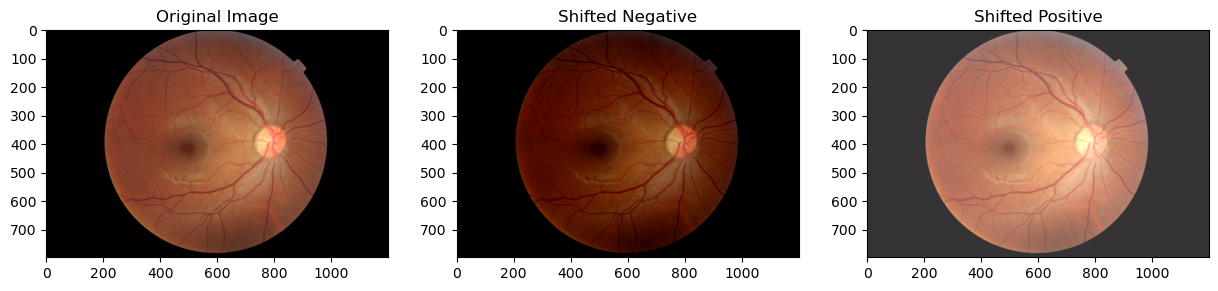

In [18]:
# Lösung hier
image = ski.util.img_as_float(image)
shifted_negative_float = image - 0.2
shifted_positive_float = image + 0.2
print(f'Maximalwert: {shifted_negative_float.max()}')
print(f'Minimalwert: {shifted_positive_float.max()}')
# Visualisiert und erklärt die Ergebnisse in einem (oder mehreren) Plots l

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(shifted_negative_float)
axes[1].set_title('Shifted Negative')
axes[2].imshow(shifted_positive_float)
axes[2].set_title('Shifted Positive')
plt.show()


Die Bilder haben keinen Over/Underflow mehr(wenn sie geladen werden), statdessen wird in den Wertebereich geclipped. #TODO Was heißt maximal Werte 

#### d) Speichert das Bild inklusive der +0.2 Verschiebung in einer neuen Datei mit Hilfe der imsave-Funktion von scikit-image und ladet das Ergebnis erneut. Haben sich die Intensitätswerte verändert? Begründet eure Antwort. (2P)

#### e) CFP.png ist ein Farbbild und hat deshalb drei Kanäle (rot, grün und blau). Modifiziert das Bild so, dass das Resultat der imshow-Funktion ähnlich zu dem in Abbildung 1 (rechts) ist. (3P)

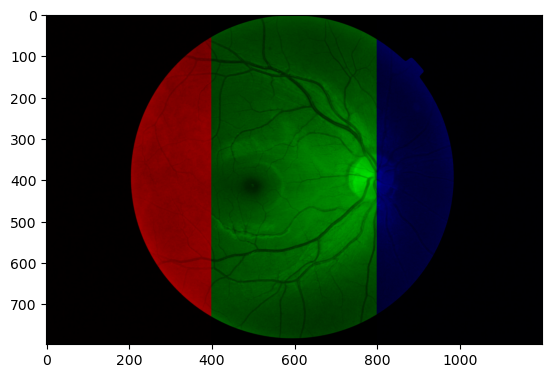

In [24]:
# Lösung hier
img = ski.io.imread("CFP.png")

img[:, 0:400, 1] = 0
img[:, 0:400, 2] = 0
img[:, 400:800, 0] = 0
img[:, 400:800, 2] = 0
img[:, 800:1200, 0] = 0
img[:, 800:1200, 1] = 0

plt.imshow(img)
plt.show()


#### f) Speichert den Grün-Kanal als Graustufen-Bild einmal mit der imsave-Funktion von scikit-image und einmal mit der von matplotlib. Ladet beide Bilder und vergleicht sie. Wie unterscheiden sie sich? (3P)

In [27]:
# Lösung hier
img2 = ski.io.imread("CFP.png")
ski.io.imsave("gray_scale_ski.png", img2[:,:,1])
plt.imsave("gray_scale_plt.png", img2[:,:,1])